Exploration of linear regression

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time


# X, y = mglearn.datasets.make_wave(n_samples = 60)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# lr = LinearRegression().fit(X_train, y_train)

In [99]:
def convert_dates(date_list):
    """
    Takes iterable of date strings (eg:'1900-1-1') as a parameter and returns a pd.Series
    of datetime objects 
    """

    # split date strings in to year, month, day. date_array becomes a 2d array where
    # first axis is dates, and second axis is year, month, and day
    date_array = []    
    for date in date_list:
        date_array.append(date.split('-'))
    
    # convert date strings into ints
    clean_dates = []
    for date in date_array:
        clean_dates.append([int(d) for d in date])
        
    # convert int lists to datetime objects
    datetimes = []
    for date in clean_dates:
        t = datetime(date[0], date[1], date[2])
        datetimes.append(time.mktime(t.timetuple()))
        
    return datetimes

In [100]:
# create dataframe of 5 years of S&P 500 data to 1/2/2019
sp500df = pd.read_csv('gspc.csv')

raw_dates = pd.Series(sp500df['Date'][1:])

In [116]:
X = np.array(convert_dates(raw_dates))
y = np.array(sp500df['Close'][1:])

# reshape y because sklearn needs 2d array
X = X.reshape(-1, 1)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [114]:
# create model and predictions
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

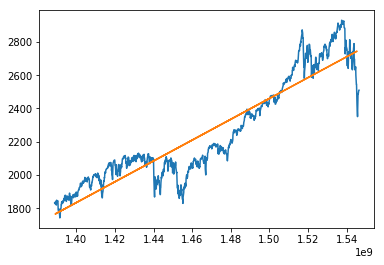

In [115]:
plt.plot(X,y)
plt.plot(X_test, y_pred)